In [1]:
import numpy as np
import pandas as pd  
import seaborn as sns
from sklearn.datasets import load_boston
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = (10.0, 5.0)

# Description

- I take the dataset from sklearn package and show its description:

In [2]:
# Stored the dataset in a variable, DS
DS = load_boston()
# Dataset characteristics:
print(DS.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

---
- Then there is 506 rows and 13 attributes other than the price median value (target). 
- This data was collected in 1978 and each of the 506 entries represents aggregate information about 14 features of homes from various suburbs located in Boston.
- Now I create a pandas data frame to display the header of the table as a sample:

In [3]:
print('(#rows, #columns):', DS.data.shape)
bhp = pd.DataFrame(DS.data, columns=DS.feature_names) # bhp stands for Boston house prices
bhp.index += 1 #starting the index from 1 instead of 0 (first row is still indexed as 0)
bhp['MEDV'] = DS.target # Adding prices to the table
bhp.head()

(#rows, #columns): (506, 13)


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
1,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


For a first glance there is a good option to describe all the attributes of the dataset individually visualize their distribution by twos. That is what the code from the cell below shows, it is commented because it takes a lot of space and much data is not relevant / interesting. Following, I will summarise the highlights but if you are curious you could just uncomment the lines below and rerun the cell

In [39]:
# sns.pairplot(bhp)
# plt.show()
# bhp.describe().T

- Making sure that all the values are floats and check if any of them are missing:

In [4]:
bhp.dtypes

CRIM       float64
ZN         float64
INDUS      float64
CHAS       float64
NOX        float64
RM         float64
AGE        float64
DIS        float64
RAD        float64
TAX        float64
PTRATIO    float64
B          float64
LSTAT      float64
MEDV       float64
dtype: object

In [5]:
bhp.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

- All are floats and there is no missing values.
- The main atribute, which this notebook focuses on is the price of the houses (__MEDV__, median value of the price in $1000's)


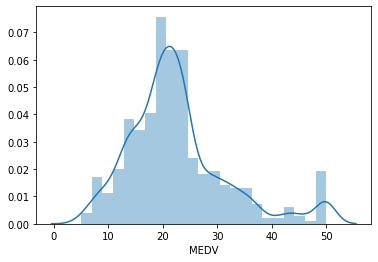

In [6]:
# Chart of the price attribute
sns.distplot(bhp['MEDV'])
plt.show()

- It shows a normal distribution where there is more data concentrated on the smaller value side (left) with an outstanding rise on the highest price side (right). This is no surprise since in general most population can not afford the most pricey houses.The figures show the same, 75% of the values are up to 25.00, which is near the mean (22.53)

In [7]:
# Data exploration
bhp['MEDV'].describe()

count    506.000000
mean      22.532806
std        9.197104
min        5.000000
25%       17.025000
50%       21.200000
75%       25.000000
max       50.000000
Name: MEDV, dtype: float64

- There is a <u>moderate to strong correlation</u> between price (__MEDV__) and number of rooms (__RM__). Note that this figure is displayed as 0.70 whereas the actual value is 0.695359947071539 since it was rounded when formatting floats to show only two decimal points (this affects the whole table with correlations above). This fact is meaningless in terms of interpretation.

In [8]:
bhp['RM'].corr(bhp['MEDV'])

0.695359947071539

Now I will plot it along with its regression line in red:

m = 9.102108981180317 ; c = -34.67062077643858


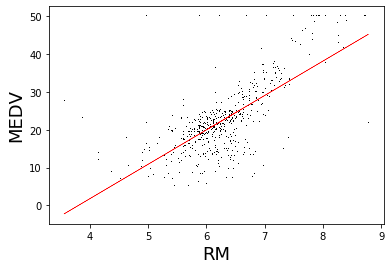

In [34]:
# plotting both variables with small black dots 
plt.plot(bhp['RM'],bhp['MEDV'], 'k,')
# getting the parameters from the regression line that best fit these pair of coordinates
m, c = np.polyfit(bhp['RM'], bhp['MEDV'], 1)
print('m =', m, '; c =', c)
# drawing the regression line in red
plt.plot(bhp['RM'], m * bhp['RM'] + c, 'r', linewidth=0.5)
# setting axes labels
plt.xlabel('RM', fontsize=18)
plt.ylabel('MEDV', fontsize=18)
plt.show()

Then the function that defines this linear correlation is:

$$ MEDV = 9.1 LSTAT - 34.67 $$


- And this correlation between price and number of rooms tends to be the rule in practice.
- Also there is a <u>moderate to strong negative linear correlation</u> with a coefficient of -0.74 between price (__MEDV__) and the proportion of population with limited resources (__LSTAT__). This is, the greater proportion of this population, the lower the price is.
- However when plotting this two ocurrences I do not see a linear relation, but a quadratic or even asymptotic one:

m =  0.04354688935822216 n =  -2.3328210982827313 c =  42.862007328169355


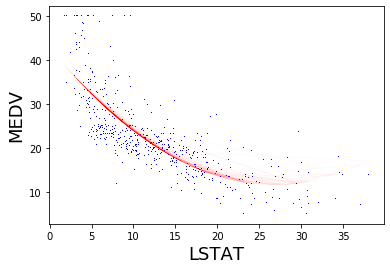

In [33]:
# plotting both variables with small blue dots 
plt.plot(bhp['LSTAT'],bhp['MEDV'], 'b,')
# getting the parameters from the regression line that best fit these pair of coordinates
m, n, c = np.polyfit(bhp['LSTAT'], bhp['MEDV'], 2)
# drawing the regression line in red
plt.plot(bhp['LSTAT'], m*bhp['LSTAT']**2 + n * bhp['LSTAT'] + c, 'r-', linewidth=0.02)
# setting axes labels
plt.xlabel('LSTAT', fontsize=18)
plt.ylabel('MEDV', fontsize=18)
print('m = ', m, 'n = ', n, 'c = ', c)

In turn, __LSTAT__ is also moderately correlated to __INDUS__, __NOX__, __AGE__, __TAX__ and also __RM__ as I explained above. So by checking the correlation coefficient I have chosen the main attributes to consider: the two which are more related to the price (__RM__ and __LSTAT__), which is the target, and the main influencers over these two (__INDUS__, __NOX__, __AGE__, __TAX__), six of them in total.

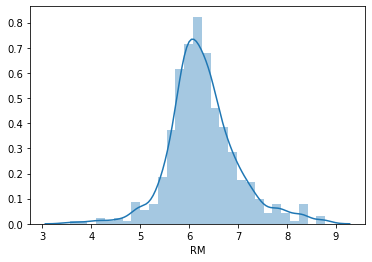

In [13]:
sns.distplot(bhp["RM"])
plt.show()
# average number of rooms per dwelling

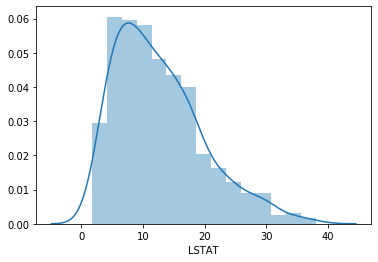

In [14]:
sns.distplot(bhp["LSTAT"])
plt.show()
# % lower status of the population

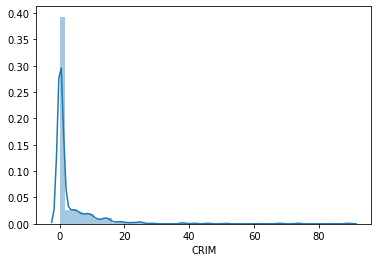

In [37]:
sns.distplot(bhp["CRIM"])
plt.show()
# per capita crime rate by town

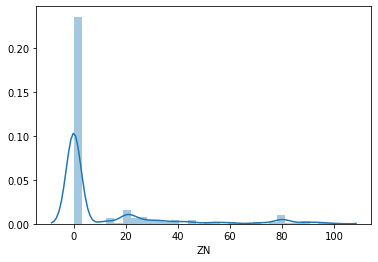

In [16]:
sns.distplot(bhp["ZN"])
plt.show()
# NO. Proportion of residential land zoned for lots over 25,000 sq.ft.

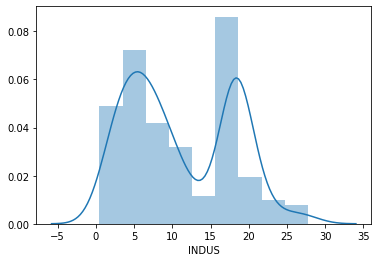

In [17]:
sns.distplot(bhp["INDUS"])
plt.show()
# propocion terreno industrial. Distro normal con dos cabezas, tendencia a baja proporcion, ~6%

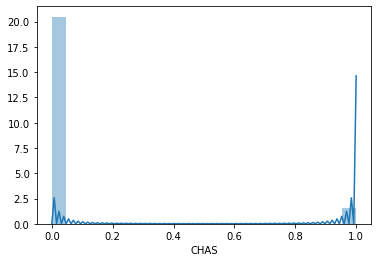

35.0

In [18]:
sns.distplot(bhp["CHAS"])
# Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
plt.show()
bhp['CHAS'].sum()
# hay 35 barrios en la orilla del rio (hay 35 unos)

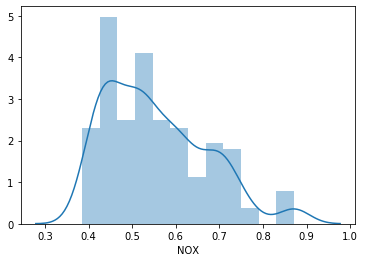

In [19]:
sns.distplot(bhp["NOX"])
plt.show()
# nitric oxides concentration (parts per 10 million)

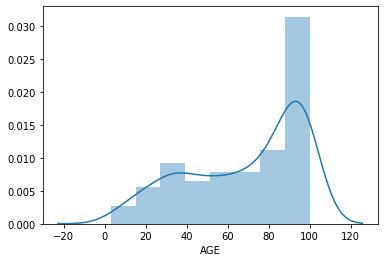

In [20]:
sns.distplot(bhp["AGE"])
plt.show()
# proportion of owner-occupied units built prior to 1940

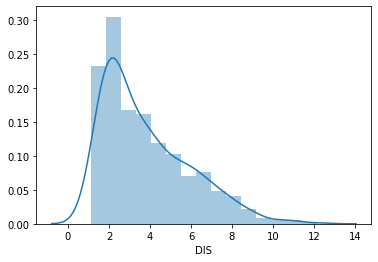

In [21]:
sns.distplot(bhp["DIS"])
plt.show()
#weighted distances to five Boston employment centres

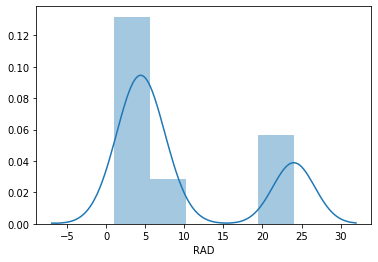

In [22]:
sns.distplot(bhp["RAD"])
plt.show()
# index of accessibility to radial highways

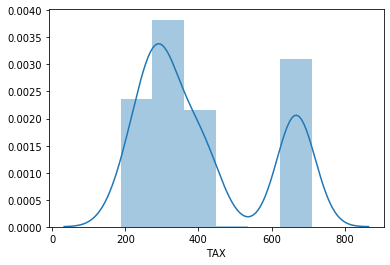

In [23]:
sns.distplot(bhp["TAX"])
plt.show()
# full-value property-tax rate per $10,000

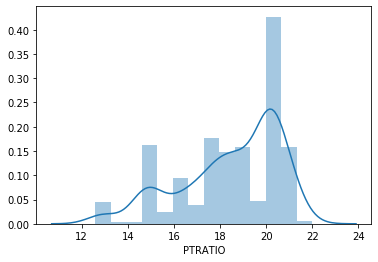

In [24]:
sns.distplot(bhp["PTRATIO"])
plt.show()
# pupil-teacher ratio by town

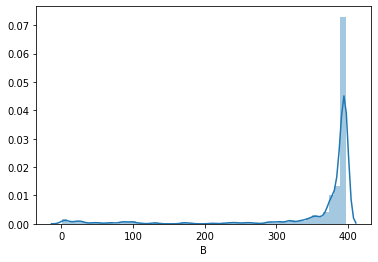

In [25]:
sns.distplot(bhp["B"])
plt.show()
# 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town

It has a bell-like shape typical from the normal distribution. The shape of the left side is smoother but the right one is steeper. And regarding the extremes, the very left side with smaller observations is flat whereas the very right side has an outstanding outsider peak.

In [26]:
# Data exploration
bhp.describe().T

,count,mean,std,min,25%,50%,75%,max
CRIM,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
ZN,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
INDUS,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
CHAS,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
NOX,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
RM,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
AGE,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
DIS,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
RAD,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
TAX,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


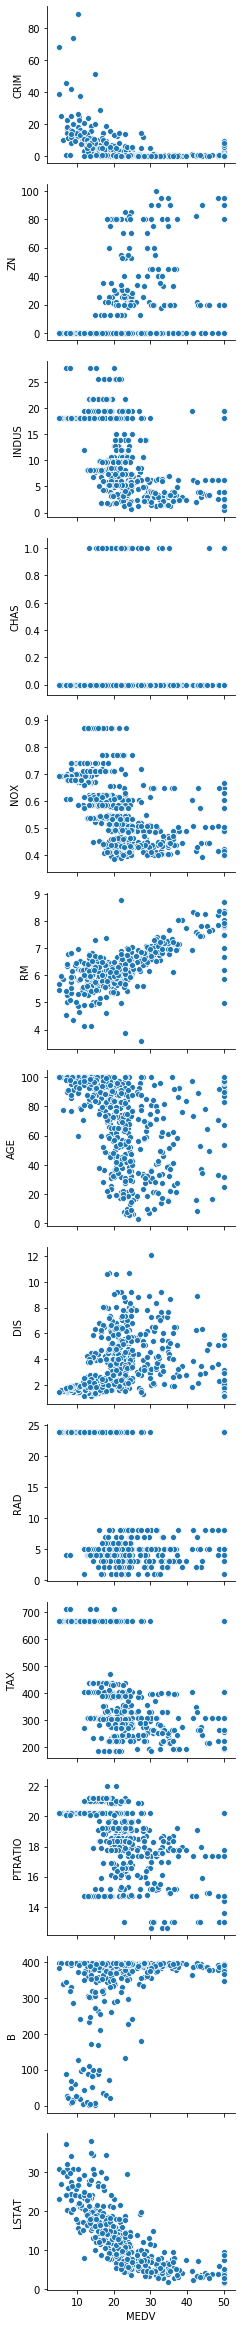

In [28]:
sns.pairplot(bhp, 
                 x_vars=["MEDV"],
                 y_vars=["CRIM","ZN","INDUS","CHAS","NOX","RM","AGE","DIS","RAD","TAX","PTRATIO","B","LSTAT"], aspect=11.7/8.27)
plt.show()

# Inference

# Prediction